## Predicting the Survival of Titanic Passengers

Here we model the classification model from titanic passengers dataset (https://www.kaggle.com/c/titanic).
We will predict passengers survival status.

In [313]:
import pandas as pd 
import seaborn as sns

In [314]:
df_test = pd.read_csv("data/titanic/test.csv")
df_train = pd.read_csv("data/titanic/train.csv")

### Exploratory Data Analysis

In [315]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [316]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


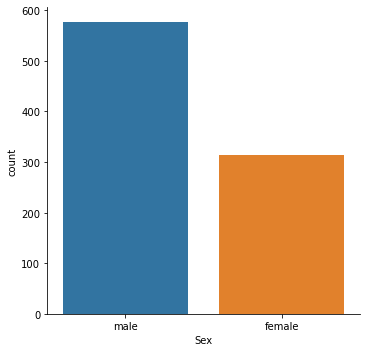

In [317]:
sns.catplot(x='Sex', kind='count', data=df_train, orient='h')

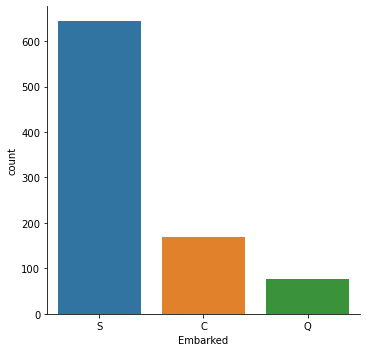

In [318]:
sns.catplot(x='Embarked', kind='count', data=df_train, orient='h')

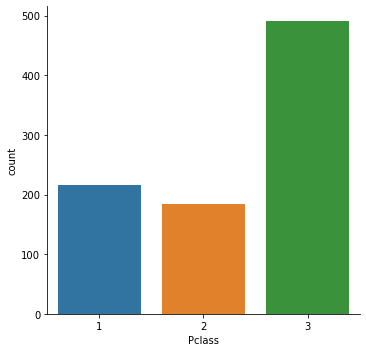

In [319]:
sns.catplot(x='Pclass', kind='count', data=df_train, orient='h')

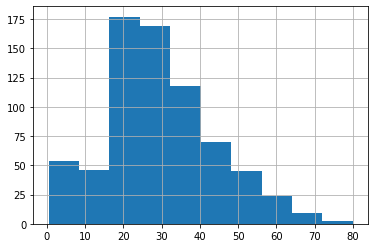

In [320]:
df_train['Age'].hist()

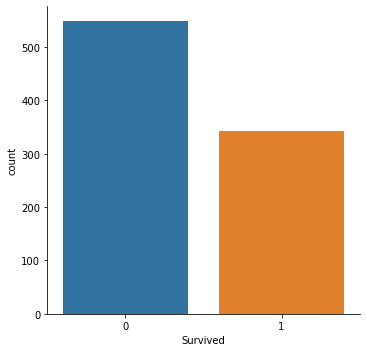

In [321]:
sns.catplot(x='Survived', kind='count', data=df_train, orient='h')

In [322]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Preprocessing

In [324]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)

In [326]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [327]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [328]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [329]:
df_train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [330]:
df_train['Age'].fillna(value=df_train['Age'].mean(), inplace=True)
df_train['Cabin'].fillna(value=df_train['Cabin'].mode()[0], inplace=True)
df_train['Embarked'].fillna(value=df_train['Embarked'].mode()[0], inplace=True)

In [331]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [332]:
df_train = df_train.drop(['Cabin'], axis=1)

In [333]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [334]:
df_train = pd.get_dummies(df_train)

### Building Model

In [335]:
x = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [336]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test  = train_test_split(x , y, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(f"""{x_train.shape}  \n{x_test.shape}  \n{y_train.shape}  \n{y_test.shape} """)

(623, 10)  
(268, 10)  
(623,)  
(268,) 


In [337]:
list_model = []
list_acc = []
list_precision = []
list_recall = []

def evaluation(m):
    model = m
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = round(metrics.accuracy_score(y_test, y_pred),2)
    prec = round(metrics.precision_score(y_test, y_pred),2)
    recall = round(metrics.recall_score(y_test, y_pred),2)
    list_model.append(str(model).split('(')[0])
    list_acc.append(acc)
    list_precision.append(prec)
    list_recall.append(recall)
    print(f"""Accuracy : {acc} \nPrecision : {prec} \nRecall : {recall}""")

### SVC

In [338]:
from sklearn.svm import SVC
from sklearn import metrics
evaluation(SVC())

Accuracy : 0.65 
Precision : 0.7 
Recall : 0.33


### KNN

In [339]:
from sklearn.neighbors import KNeighborsClassifier
evaluation(KNeighborsClassifier(n_neighbors=7))

Accuracy : 0.72 
Precision : 0.72 
Recall : 0.56


### Decision Tree

In [340]:
from sklearn import tree
evaluation(tree.DecisionTreeClassifier(min_impurity_decrease=0.01))

Accuracy : 0.77 
Precision : 0.85 
Recall : 0.57


### Naive Bayes

In [341]:
# Import Module
from sklearn.naive_bayes import GaussianNB 
evaluation(GaussianNB())

Accuracy : 0.76 
Precision : 0.75 
Recall : 0.69


### Random Forest Classifier

In [342]:
from sklearn.ensemble import RandomForestClassifier
evaluation(RandomForestClassifier(max_depth=2, random_state=0))

Accuracy : 0.75 
Precision : 0.76 
Recall : 0.63


In [343]:
df_summary = pd.DataFrame({'Algoritma' : list_model, 'Accuracy' : list_acc, 'Precision' : list_precision, 'Recall' : list_recall})
df_summary.sort_values(by='Accuracy',ascending=False)

,Algoritma,Accuracy,Precision,Recall
2,DecisionTreeClassifier,0.77,0.85,0.57
3,GaussianNB,0.76,0.75,0.69
4,RandomForestClassifier,0.75,0.76,0.63
1,KNeighborsClassifier,0.72,0.72,0.56
0,SVC,0.65,0.70,0.33


### Hyperparameter Tuning

In [344]:
from sklearn.model_selection import GridSearchCV
dtc = tree.DecisionTreeClassifier()
criterion = ('gini', 'entropy')
splitter = ('best', 'random')
max_features = ('auto','sqrt','log2')
max_depth = [2,4,6,8,10,12]
params = {
    'criterion' : criterion,
    'splitter' : splitter,
    'max_features' : max_features,
    'max_depth' : max_depth
    
}

In [345]:
gsdtc = GridSearchCV(dtc, params, n_jobs=4, cv=5)
gsdtc.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')})

In [346]:
gsdtc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'splitter': 'best'}

### Model Selection

In [347]:
model = DecisionTreeClassifier(**gsdtc.best_params_)
evaluation(model)

Accuracy : 0.77 
Precision : 0.84 
Recall : 0.57


In [348]:
model = DecisionTreeClassifier(criterion='gini',max_depth=6)
model.fit(x,y)

DecisionTreeClassifier(max_depth=6)

### Prediction

In [349]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [350]:
df_test = df_test.drop(['Name','Ticket'], axis=1)

In [351]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [352]:
df_test['Age'].fillna(value=df_test['Age'].mean(), inplace=True)
df_test['Cabin'].fillna(value=df_test['Cabin'].mode()[0], inplace=True)
df_test['Fare'].fillna(value=df_test['Fare'].mean(), inplace=True)

In [353]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [354]:
df_test = df_test.drop(['Cabin'], axis=1)

In [355]:
df_test = pd.get_dummies(df_test)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [356]:
y_pred = model.predict(df_test[x.columns.to_list()])

In [357]:
pd.DataFrame({'PassengerId' : df_test['PassengerId'], 'Survived' : y_pred }).to_csv('data/titanic/Submission.csv',index=False)

After the prediction process using Decision Tree algorithm and evaluation process using kaggle, it obtained accuracy of **76.79%**. This means that this algorithm has an error tolerance of **23.21 %**. 